# Домашнее задание 4

Добро пожаловать на четвертое домашнее задание! В нем Вам предлагается построить дерево решений для задачи бинарной классификации: 

В данном домашнем задании Вам предлагается построить дерево решений с узлами показанными на рисунке для решения задачи бинарной классификации. Обучающий датасет состоит из данных о людях, в которых содержится информация об их оценках в школе по **математике, информатике и русскому языку**. В качестве целевого признака нужно предсказать **работают они Data scientist'ами или нет**.

Давайте посмотрим на предложенный набор данных!

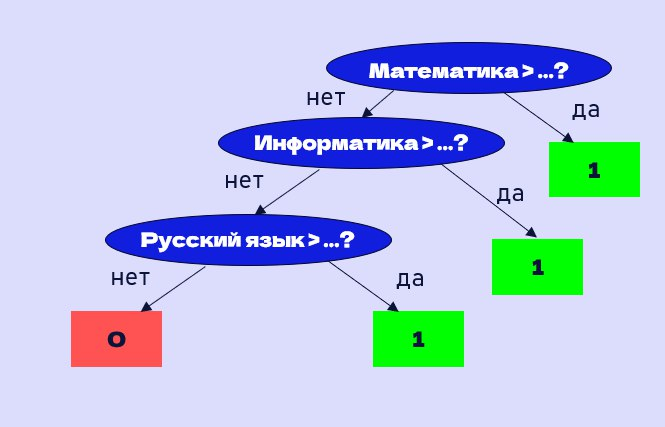

In [1]:
import pandas as pd
df = pd.read_csv("ds_dataset_train__10zag.csv", index_col = 0)

In [2]:
df

,Математика,Информатика,Русский_язык,Data_scientist
id,,,,
0,5,2,3,1
1,3,5,5,1
2,4,2,3,0
3,4,4,3,0
4,3,4,4,1
...,...,...,...,...
1995,3,3,3,0
1996,2,2,2,0
1997,2,2,4,1


Объявим функцию, которую Вы будете дополнять по ходу Вашего исследования данных для создания дерева решений

In [8]:
def classification_tree(X):
    if X["Математика"] > 4:
        return 1
    else:
        if X["Информатика"] > 4:
            return 1
        
        else:
            if X["Русский_язык"] > 3:
                return 1
            else:   
                return 0
    return 0

### Задание 1

Разделите обучающий датасет на две таблицы:

1) <code>df_1</code> -- в ней будут находиться записи тех людей, которые работают в сфере Data science
2) <code>df_0</code> -- в ней будут находиться записи тех людей, которые НЕ работают в сфере Data science

In [3]:
df_1 = df[df["Data_scientist"]==1]
df_0 = df[df["Data_scientist"]==0]

Проверьте себя!

In [4]:
assert len(df_1) == 1457, "Неправильное разделение таблицы"

In [5]:
assert len(df_0) == 543, "Неправильное разделение таблицы"

### Задание 2

Исследуйте набор данных и создайте на основе них решающие правила, заполните пропущенные места в функции <code>classification_tree</code>

Подсказка! Испольуйте для поиска взаимосвязей и различий функцию <code>describe</code>

In [6]:
df_1.describe()

,Математика,Информатика,Русский_язык,Data_scientist
count,1457.000000,1457.000000,1457.000000,1457.0
mean,3.700755,3.624571,3.910089,1.0
std,1.177726,1.160724,1.044748,0.0
min,2.000000,2.000000,2.000000,1.0
25%,3.000000,3.000000,3.000000,1.0
50%,4.000000,4.000000,4.000000,1.0
75%,5.000000,5.000000,5.000000,1.0
max,5.000000,5.000000,5.000000,1.0


In [7]:
df_0.describe()

,Математика,Информатика,Русский_язык,Data_scientist
count,543.000000,543.000000,543.000000,543.0
mean,3.014733,2.985267,2.475138,0.0
std,0.832772,0.817116,0.499842,0.0
min,2.000000,2.000000,2.000000,0.0
25%,2.000000,2.000000,2.000000,0.0
50%,3.000000,3.000000,2.000000,0.0
75%,4.000000,4.000000,3.000000,0.0
max,4.000000,4.000000,3.000000,0.0


### Задание 3

Сохраните в переменную <code>X</code> признаки предикторы обучающего набора данных. 

Сохраните в переменную <code>y</code> целевой признак обучающего набора данных. 

Затем создайте новый столбец <code>prediction</code> в обучающем наборе данных куда Вы сохраните предсказания полученной модели.

In [9]:
X = df.drop("Data_scientist",axis=1)
y = df["Data_scientist"]
df["prediction"] = X.apply(classification_tree,axis=1)

### Задание 4

Оцените качество полученные модели с помощью <code>accuracy_score</code> 

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y, df["prediction"])

1.0

In [11]:
assert accuracy_score(y, df["prediction"]) == 1.0, "Неправильно реализована функция classification_tree"

In [12]:
print(accuracy_score(y, df["prediction"]))

1.0


### Задание 5

Оцените качество полученные модели на валидациооном датасете с помощью метрик качества таких как: <code>accuracy</code>, <code>precision</code>, <code>recall</code> и <code>f1_score</code>

In [13]:
df_val = pd.read_csv("ds_dataset_val__10zaf.csv", index_col = 0)


X_val = df_val.drop("Data_scientist",axis=1)
y_val = df_val["Data_scientist"]
df_val["prediction"] = X_val.apply(classification_tree,axis=1)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [15]:
acc_val = accuracy_score(y_val,df_val["prediction"])

In [16]:
precision_val = precision_score(y_val,df_val["prediction"])

In [17]:
recall_val = recall_score(y_val,df_val["prediction"])

In [18]:
f1_val = f1_score(y_val,df_val["prediction"])

In [19]:
print(acc_val,precision_val,recall_val,f1_val)

0.8366666666666667 0.8149779735682819 0.9635416666666666 0.883054892601432


И так, поздравляем, Вы выполнили четвертое домашнее задание!

Теперь осталось чуть-чуть...

На платформу Школково Вам нужно будет загрузить таблицу с метриками качества вашей модели измеренными на валидационном датасете.

Чтобы сделать это, выполните ячейку выше. Тем самым Вы получите нужную таблицу. Загрузите ее на платформу Школково.

In [20]:
df_rezults = pd.DataFrame([
                    [acc_val, precision_val, recall_val, f1_val]
                    ],
                   columns=['accuracy', 'precision', 'recall', 'f1'], index=["Дерево решений"])

In [21]:
df_rezults.to_csv("h4_prod.csv")